In [1]:
jobs = # list of lists of strings for job IDs.

In [2]:
RESULT_DIR = 'results/64/'

In [3]:
import glob
import numpy as np
import pandas as pd
import json
%matplotlib inline
from matplotlib import pyplot as plt

In [4]:
dirs = [[glob.glob(f'results/{i}-*/[0-9]*')[0] for i in j] for j in jobs]

In [5]:
accs = [[json.load(open(i + '/acc.json')) for i in d] for d in dirs]

In [6]:
acc_test = np.array([[i['test'] for i in a] for a in accs])

In [7]:
acc_test.mean(axis=1)

array([0.7029, 0.7051, 0.6849, 0.6445, 0.6066])

In [8]:
acc_test.std(axis=1)

array([0.0053376 , 0.0078543 , 0.01291085, 0.01528561, 0.01695995])

In [9]:
# Plot cosine values

In [10]:
cosines = [[np.load(i + '/cosine.npy') for i in d] for d in dirs]

In [11]:
dname = f'{RESULT_DIR}/cosine'
!mkdir -p $dname

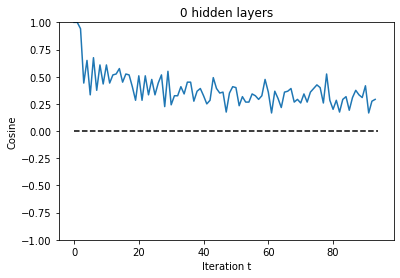

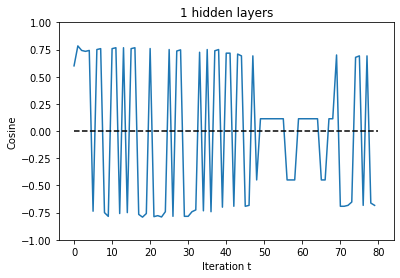

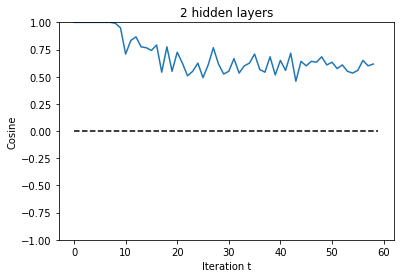

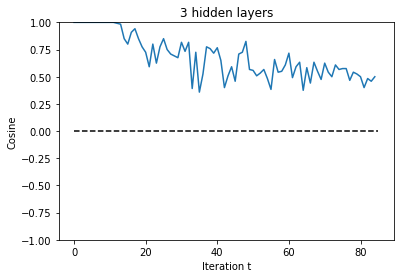

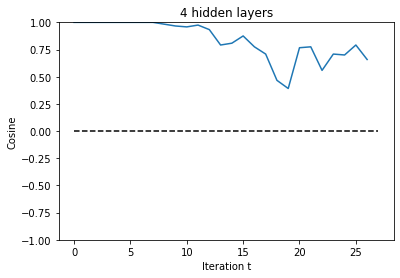

In [12]:
for n_layers, (c, d) in enumerate(zip(cosines, dirs)):
    plt.plot(c[0])
    plt.ylim((-1., 1.))
    plt.title(f'{n_layers} hidden layers')
    plt.plot([0, len(c[0])], [0, 0], c='black', ls="--")
    plt.xlabel('Iteration t')
    plt.ylabel('Cosine')
    
    plt.savefig(f'{dname}/{n_layers}.pdf')
    plt.show()

In [13]:
# Plot train losses

In [14]:
loss_train = [[np.load(i + '/loss_train.npy') for i in d] for d in dirs]

In [15]:
dname = f'{RESULT_DIR}/loss_train'
!mkdir -p $dname

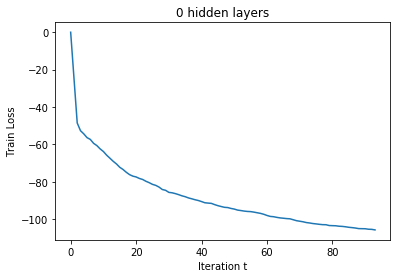

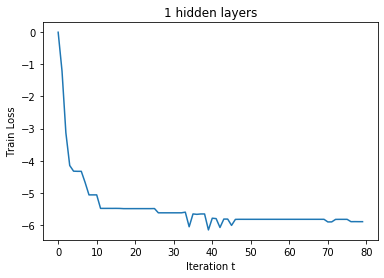

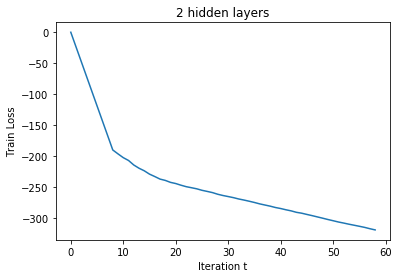

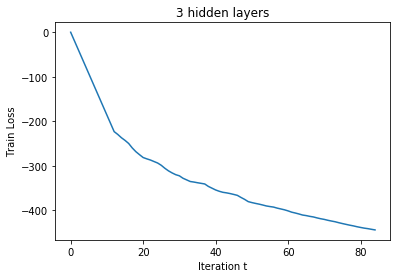

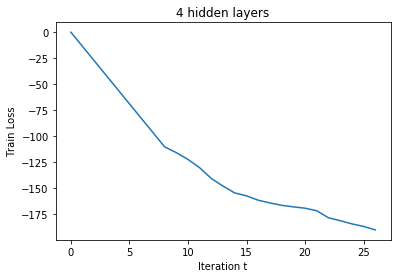

In [16]:
for n_layers, (c, d) in enumerate(zip(loss_train, dirs)):
    plt.plot(c[0])
    plt.title(f'{n_layers} hidden layers')
    plt.xlabel('Iteration t')
    plt.ylabel('Train Loss')
    
    plt.savefig(f'{dname}/{n_layers}.pdf')
    plt.show()

In [17]:
# packing
!tar zcvf result.tar.gz $RESULT_DIR

results/64/
results/64/cosine/
results/64/cosine/1.pdf
results/64/cosine/4.pdf
results/64/cosine/0.pdf
results/64/cosine/3.pdf
results/64/cosine/2.pdf
results/64/loss_train/
results/64/loss_train/1.pdf
results/64/loss_train/4.pdf
results/64/loss_train/0.pdf
results/64/loss_train/3.pdf
results/64/loss_train/2.pdf
